## Data

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
cid = #cid
secret = #secret
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [13]:
def factorDimensions(total):
    dim1, dim2, i = 1, total, 0
    while dim1 < dim2:
        i += 1
        if total % i == 0:
            dim1 = i
            dim2 = total//dim1
    return (dim2, dim1)

In [14]:
song_colors = pd.read_csv('song-color.csv', engine='python')
song_colors.head()

,songName,songArtist,spotifyURI,r,g,b,albumName
0,1 2 365 4 Me,Kennen,spotify:track:6TtDPG6eFqDGooeyKYXaea,213,0,50,NaN
1,Suzanne,Bermuda Triangle,spotify:track:3MBZ0BaWosUjsn40TeYYk5,254,243,128,NaN
2,Trace,Micah Marcos,spotify:track:1CXeNAaiWBBOkpstvC8WJp,250,222,133,NaN
3,Hey There Delilah,Plain White T's,spotify:track:4RCWB3V8V0dignt99LZ8vH,255,214,98,NaN
4,???,Yuma Yamaguchi,spotify:track:3quI9fle27boUZXStQKtxy,254,219,0,NaN


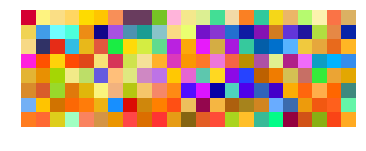

In [15]:
colors = np.array(song_colors[['r','g','b']])
indices = np.array(range(len(colors)))
indices.shape = factorDimensions(len(colors))

plt.imshow(colors[indices])
plt.axis("off")
plt.savefig("figures/colors.png")

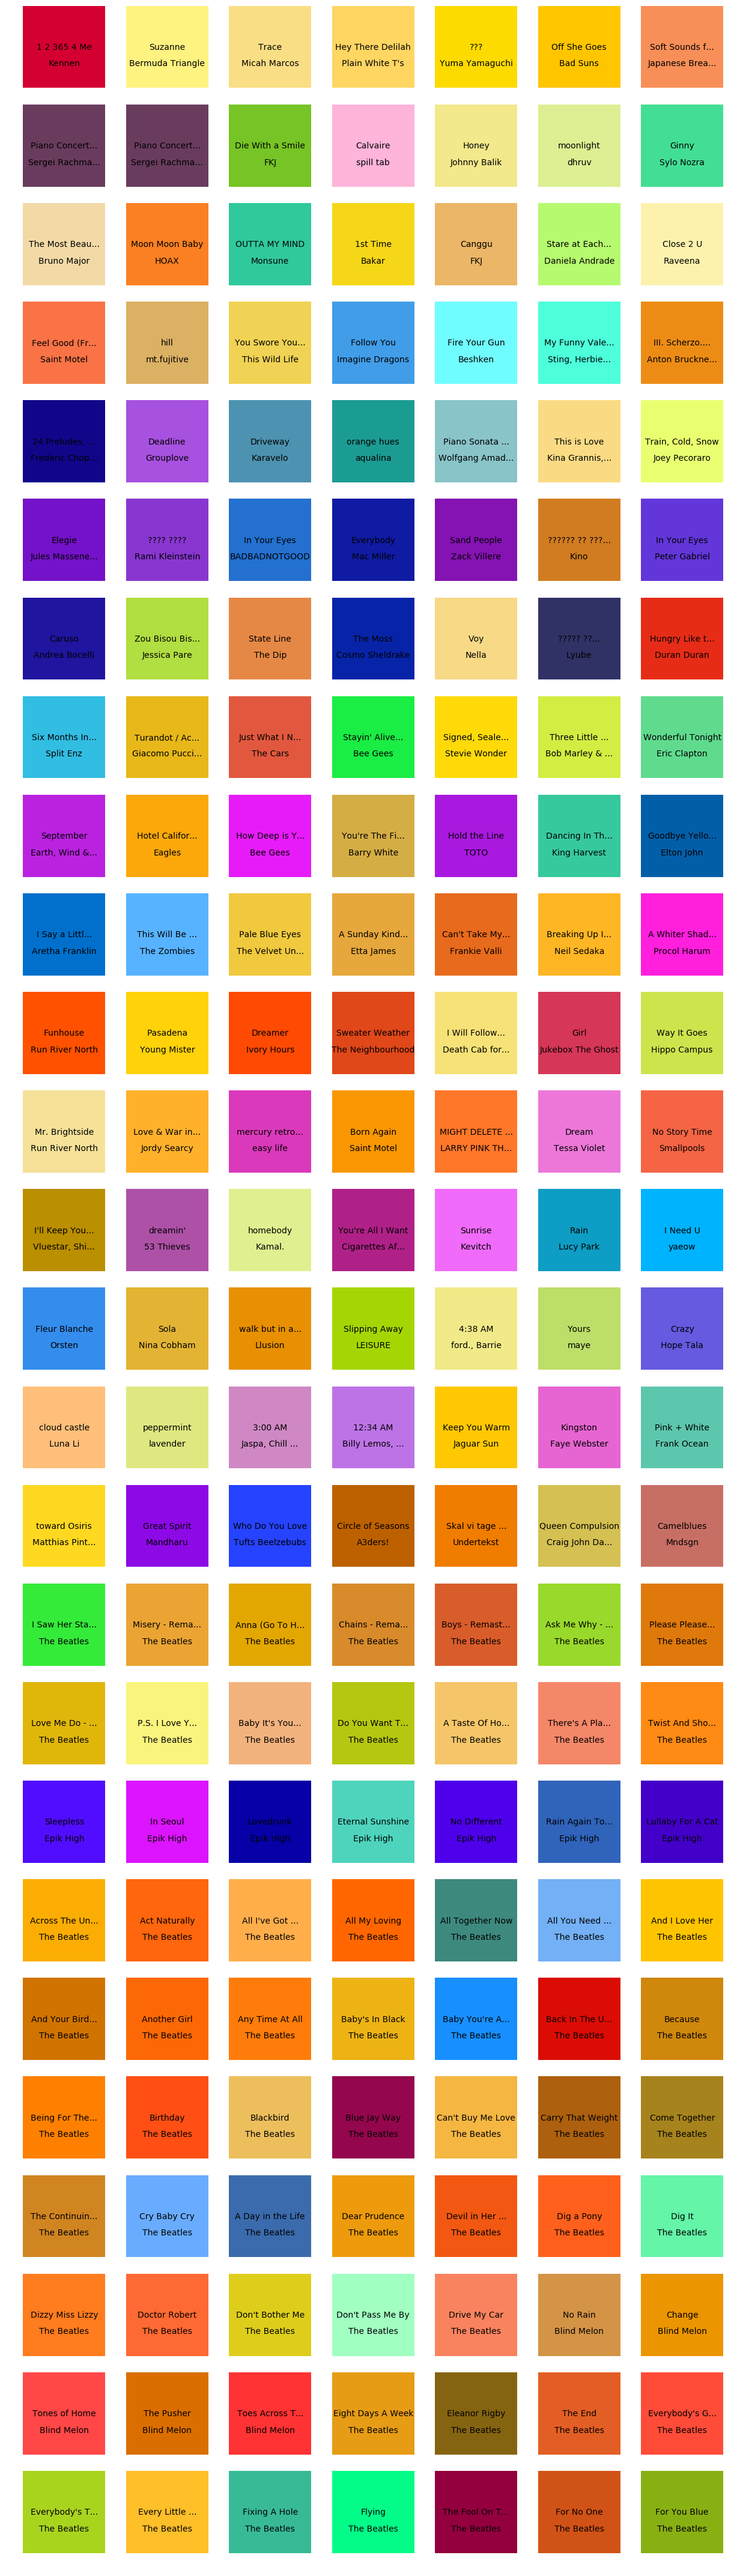

In [16]:
cols = 7
rows = len(colors)//cols

fig, ax = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
i=0

total_length = 17
abridged_length = total_length - 4

for row in ax:
    for col in row:
        col.imshow(np.array([[[song_colors['r'][i], song_colors['g'][i], song_colors['b'][i]]]]))
        col.axis('off')
        
        if len(song_colors['songName'][i]) > total_length:
            col.set_xlabel(song_colors['songName'][i][:abridged_length] + '...')
            col.text(0, 0, song_colors['songName'][i][:abridged_length] + '...',
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=14)
        else:
            col.text(0, 0, song_colors['songName'][i],
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=14)
            
        if len(song_colors['songArtist'][i]) > total_length:
            col.text(0, 0.2, song_colors['songArtist'][i][:abridged_length] + '...',
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=14)
        else:      
            col.text(0, 0.2, song_colors['songArtist'][i],
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=14)
        
        col.set_aspect('equal')
        i+=1

plt.savefig("figures/song_colors.png")

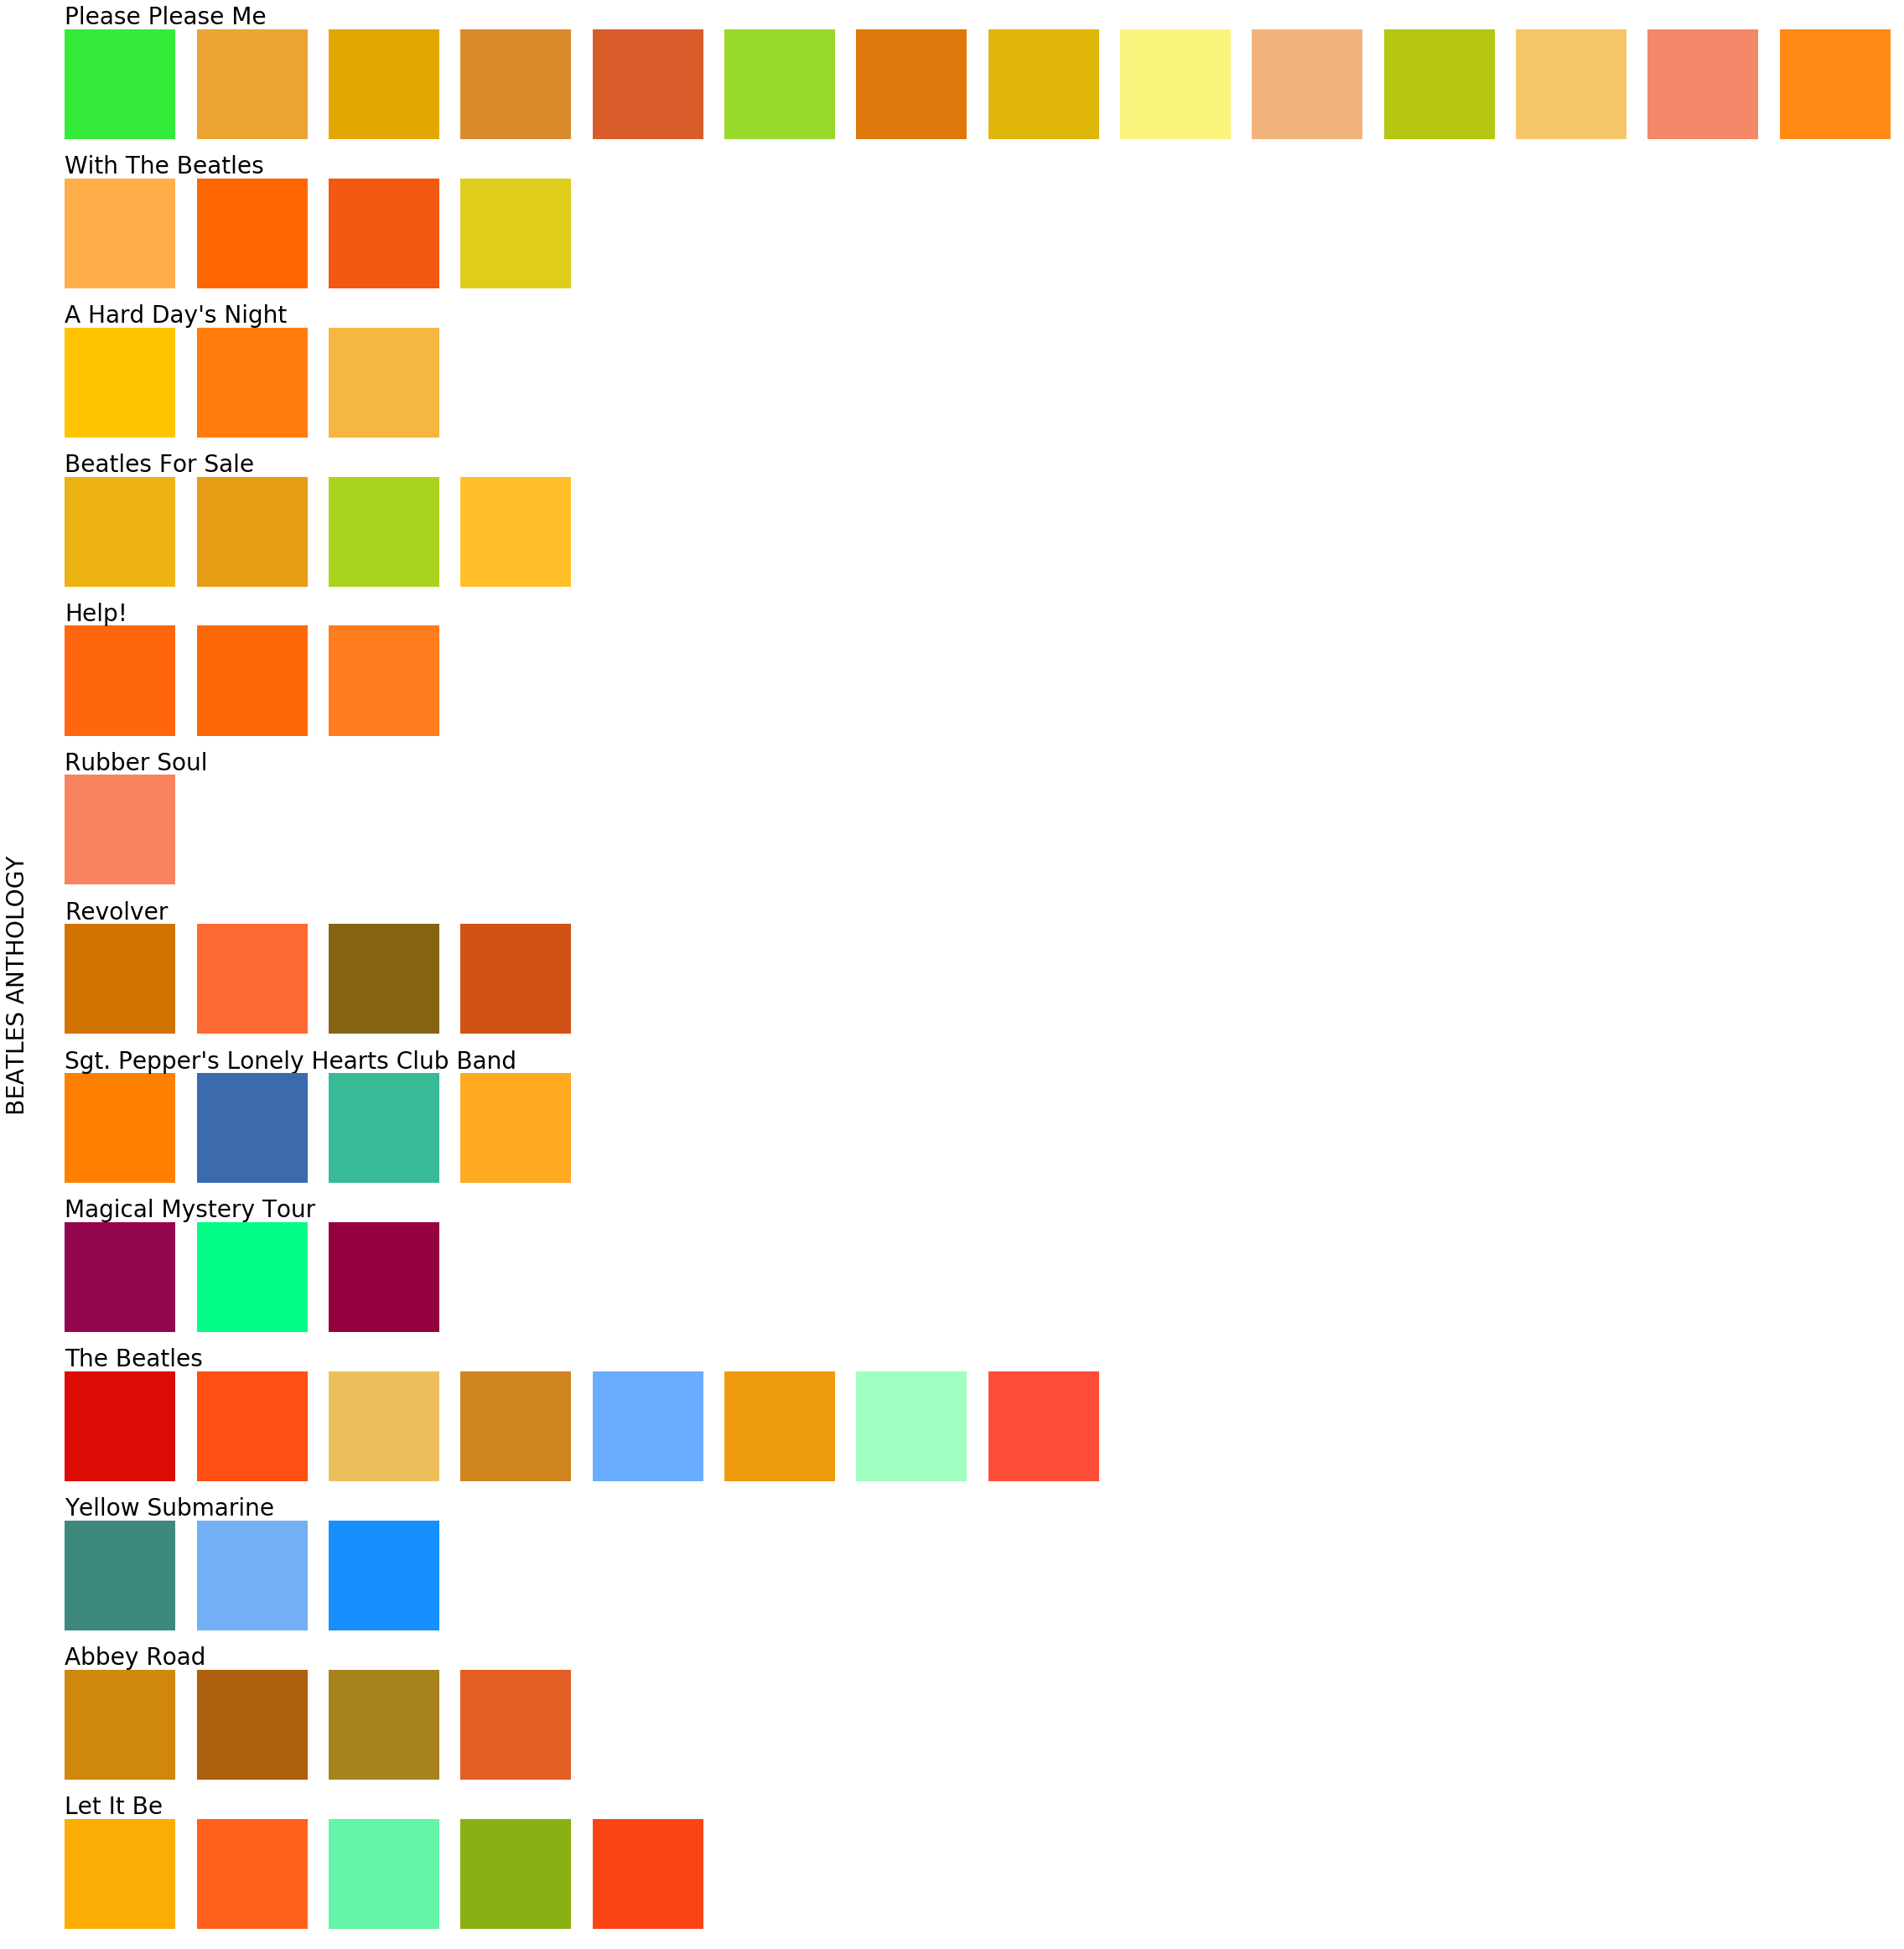

In [17]:
beatles = song_colors[song_colors['songArtist'] == 'The Beatles']
beatlesOrder = ['Please Please Me', 'With The Beatles', 'A Hard Day\'s Night', 'Beatles For Sale',
                    'Help!', 'Rubber Soul', 'Revolver', 'Sgt. Pepper\'s Lonely Hearts Club Band',
                    'Magical Mystery Tour', 'The Beatles', 'Yellow Submarine', 'Abbey Road', 'Let It Be']

def normalizeAlbums(songs, albumOrder):
    column_names = ['songName', 'songArtist', 'spotifyURI', 'r', 'g', 'b', 'albumName']
    max_songs = max(songs['albumName'].value_counts())
    
    normalized_songs = pd.DataFrame(columns=column_names)
    for album in albumOrder:
        normalized_songs = normalized_songs.append(songs[songs['albumName'] == album])
        album_length = len(songs[songs['albumName'] == album].index)
        if album_length < max_songs:
            normalized_album = np.tile(np.array(['','','',255,255,255,album]), (max_songs - album_length, 1))
            normalized_songs = normalized_songs.append(pd.DataFrame(normalized_album,
                                              columns=column_names))
    
    normalized_songs[['r', 'g', 'b']] = normalized_songs[['r', 'g', 'b']].apply(pd.to_numeric, axis=1) 
    normalized_songs = normalized_songs.reset_index(drop=True)
    
    return normalized_songs
            


def plotAlbumColor(colors, albumOrder, savePath):

    colors = normalizeAlbums(colors, albumOrder)
    
    rows = len(albumOrder)
    cols = int(len(colors.index)/rows)    

    fig, ax = plt.subplots(rows, cols, sharey=True, figsize=(rows*3, cols*3))
    i=0
    
    for row in ax:
            for col in row:
                col.imshow(np.array([[[colors['r'][i], colors['g'][i], colors['b'][i]]]]))
                col.axis('off')
                if i%cols == 0:
                    col.set_title(colors['albumName'][i], fontsize=28, loc='left')
                i+=1

    fig.text(0.1, 0.5, 'BEATLES ANTHOLOGY', va='center', rotation='vertical', fontsize=28)
    plt.savefig(savePath)
    plt.show()
    
plotAlbumColor(beatles, beatlesOrder, 'figures/beatles_colors.png')

C:\Program Files (x86)\PsychoPy3_PY2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


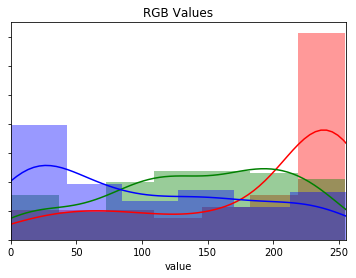

In [18]:
color_columns = ['r', 'g', 'b']


for color in color_columns:
    ax = sns.distplot(song_colors[color], color = color)
    ax.set_xlim([0, 255])
    ax.set_yticklabels([])
    ax.set(xlabel='value', title='RGB Values')

plt.savefig("figures/color_dist.png")

In [19]:
danceability = []
energy = []
key = []
loudness = []
mode = []
speechiness = []
acousticness = []
instrumentalness = []
liveness = []
valence = []
tempo = []
duration_ms = []
time_signature = []

In [20]:
trackURIs = np.array(song_colors['spotifyURI'])

for i in range(len(trackURIs)):
    features = sp.audio_features(tracks=[trackURIs[i]])

    danceability = np.append(danceability, features[0]['danceability'])
    energy = np.append(energy, features[0]['energy'])
    key = np.append(key, features[0]['key'])
    loudness = np.append(loudness, features[0]['loudness'])
    mode = np.append(mode, features[0]['mode'])
    speechiness = np.append(speechiness, features[0]['speechiness'])
    acousticness = np.append(acousticness, features[0]['acousticness'])
    instrumentalness = np.append(instrumentalness, features[0]['instrumentalness'])
    liveness = np.append(liveness, features[0]['liveness'])
    valence = np.append(valence, features[0]['valence'])
    tempo = np.append(tempo, features[0]['tempo'])
    duration_ms = np.append(duration_ms, features[0]['duration_ms'])
    time_signature = np.append(time_signature, features[0]['time_signature'])

In [21]:
audio_features = pd.DataFrame({'danceability' : danceability, 'energy' : energy, 'key' : key, "loudness" : loudness,
                           'mode' : mode, "speechiness" : speechiness, "acousticness" : acousticness,
                            "instrumentalness" : instrumentalness, "liveness" : liveness, "valence" : valence,
                           "tempo" : tempo, "duration_ms" : duration_ms, "time_signature" : time_signature})

audio_features.to_csv("audio_features.csv")
audio_features.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.111,0.621,174857.0,0.744,0.000005,6.0,0.3330,-5.881,1.0,0.0480,139.979,4.0,0.741
1,0.533,0.799,177704.0,0.480,0.015800,9.0,0.1310,-9.839,1.0,0.0690,113.428,4.0,0.635
2,0.795,0.795,171928.0,0.462,0.000006,1.0,0.1100,-11.212,0.0,0.0658,134.998,4.0,0.626
3,0.872,0.656,232533.0,0.291,0.000000,2.0,0.1140,-10.572,1.0,0.0293,103.971,4.0,0.298
4,0.923,0.870,111000.0,0.330,0.085000,5.0,0.0949,-12.329,1.0,0.0373,114.885,4.0,0.542


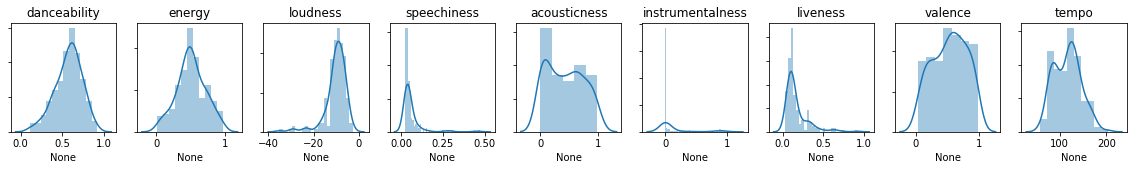

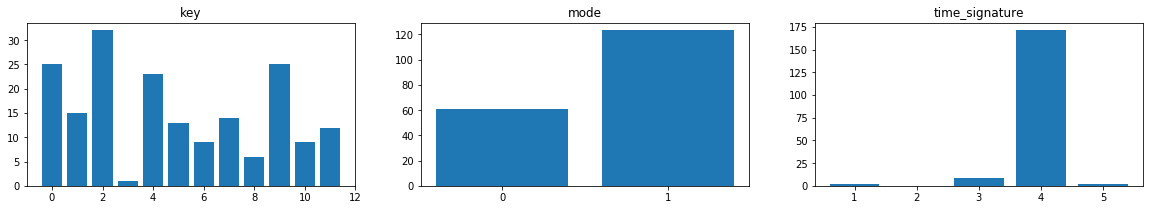

In [22]:
cont_columns = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
                'valence', 'tempo']
disc_columns = ['key', 'mode', 'time_signature']

f, axs = plt.subplots(1, 9, figsize=(20, 2))
for i in range(len(cont_columns)):
    sns.distplot(audio_features[cont_columns[i]], ax=axs[i])
    axs[i].set_yticklabels([])
    axs[i].set_xlabel(None)
    axs[i].set_title(cont_columns[i])

plt.savefig("figures/features_hist.png")
    

g, axs = plt.subplots(1, 3, figsize=(20, 3))
for i in range(len(disc_columns)):
    freq = audio_features[disc_columns[i]].value_counts().sort_index()
    axs[i].set_title(disc_columns[i])
    
    if disc_columns[i] == 'mode':
        axs[i].bar(list(map(str, map(int, freq.index))), freq.values)
    else:
        axs[i].bar(freq.index, freq.values)

plt.savefig("figures/features_bar.png")

## Model